<a href="https://colab.research.google.com/github/MariiaS/ai_and_ds/blob/main/AI_first_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task
Consider a 1D grid with :

  

*   one goal location (positive reward, e.g. +1)
*   one trap location (negative reward, e.g. -1)
*   a fixed move cost (e.g. -0.01)
*   deterministic actions (probability to go left when trying left is 1)

1.   Implement Q-learning from the equation
2.   Run your algorithm to determine the best policy
3. Optional : extend to the 2D grid described in the classical toy example
### Notes :
Use Python and numpy only (gym next week)
Submit your solution at the end of the session, deadline 12.15pm

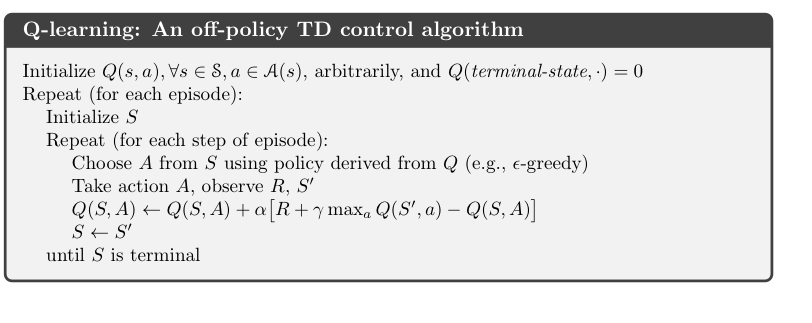

## Part 1 - 1D grid

In [ ]:
# Initial values, we define the size of the grid, rewards and cost and location of the trap and reward
#As the actioans are deterministic, we don't define a probobility for taking a left or a right move
grid_width = 50
grid_height = 1
trap_location = (0,5)
goal_location = (0,45)
trap_reward = -1
goal_reward = -1
move_cost = 0.01

`GridRules` is the class that will define the main rules of the movement on the grid as well as the reward system and current state 

In [ ]:
class GridRules:
    def __init__(self):
        # Create grid, fill it and define the starting position, which is random
        self.grid = np.zeros(( grid_height, grid_width)) - 1
        self.current_location = ( 0, np.random.randint(0,grid_width))
        
        # Initialise the terminal states and the rewards
        self.terminal_states = [ trap_location, goal_location]
        self.grid[ trap_location[0], trap_location[1]] = trap_reward
        self.grid[ goal_location[0], goal_location[1]] = goal_reward
        
        # List of the moves directions
        self.actions = ['LEFT', 'RIGHT']

    def get_reward(self, new_location): # gets the reward on the location
        return self.grid[ new_location[0], new_location[1]]

    def make_step(self, action):
      
        # Store previous location
        last_location = self.current_location
        
        if action == 'LEFT':
            if last_location[1] == 0: # If the 0 cell is reached, then we don't move left, just get reward. No move cost applied (or should it be applied?)
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] - 1)
                reward = self.get_reward(self.current_location)-move_cost
        elif action == 'RIGHT':
            if last_location[1] == grid_width - 1: # If the last cell is reached, then we don't move right, just get reward. No move cost applied
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] + 1)
                reward = self.get_reward(self.current_location)-move_cost
                
        return reward
      
    def check_state(self): # check if we found the goal or a trap. If yes, the state is END
        if self.current_location in self.terminal_states:
            return 'END'
        

In [ ]:
# initial values for Q-learning algorithm
epsilon=0.05 
learning_rate=0.1 
gamma=1

In [ ]:
class Qlearning():
    # Intialises the Q-learning algo looping through each step, update the Q-values
    def __init__(self, environment):
        self.environment = environment
        self.q_table = dict()
        for x in range(grid_height): 
            for y in range(grid_width):
                self.q_table[(x,y)] = {'LEFT':0, 'RIGHT':0} 
        
    def choose_action(self, available_actions): #Chooses the acrtion based on optimal in Q-Value table, if there are multiple, choose randomly
        if np.random.uniform(0,1) < epsilon:
            action = available_actions[np.random.randint(0, len(available_actions))]
        else:
            q_values_of_state = self.q_table[self.environment.current_location]
            maxValue = max(q_values_of_state.values())
            action = np.random.choice([k for k, v in q_values_of_state.items() if v == maxValue])
        return action
    
    def learn(self, old_state, reward, new_state, action): # Updates Q-values 
        q_values_of_state = self.q_table[new_state]
        max_q_value_in_new_state = max(q_values_of_state.values())
        current_q_value = self.q_table[old_state][action]
        
        self.q_table[old_state][action] = (1 - learning_rate) * current_q_value + learning_rate * (reward + gamma * max_q_value_in_new_state)

In [ ]:
def run(environment, agent, trials, max_steps_per_episode):
    reward_per_episode = [] # Store the information about the reward per each episode
    
    for trial in range(trials): 
        total_reward = 0 # Starting values for the each episode
        step = 0
        end_game = False
        while step < max_steps_per_episode and end_game != True: # Run until max steps or until game is finished
            old_state = environment.current_location
            action = agent.choose_action(environment.actions) 
            reward = environment.make_step(action)
            new_state = environment.current_location
            
            agent.learn(old_state, reward, new_state, action) # Updates Q-values 
          
            total_reward += reward
            step += 1
            # Check if we found a goal of a trap and end if true
            if environment.check_state() == 'END': 
                environment.__init__()
                end_game = True     
                
        reward_per_episode.append(total_reward)
        
    return reward_per_episode

-1.01
-306.02999999999867


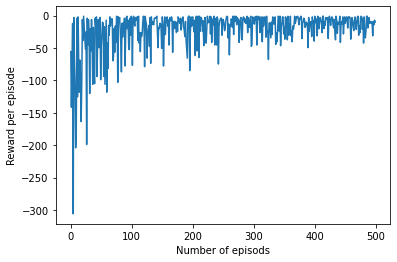

In [ ]:
environment = GridRules()
agentQ = Qlearning(environment)

reward_per_episode = run(environment, agentQ, trials=500,  max_steps_per_episode=1000)

# Visualise the rewars per episode. Ideally this should show how learning process happens
plt.xlabel('Number of episods')
plt.ylabel('Reward per episode')
plt.plot(reward_per_episode)
print(max(reward_per_episode))
print(min(reward_per_episode))

## Part 2 - 2D grid

In [ ]:
# Initial values, we define the size of the grid, rewards and cost and location of the trap and reward
#As the actioans are deterministic, we don't define a probobility for taking a left or a right move
grid_width = 10
grid_height = 10
trap_location = (1,3)
goal_location = (8,9)
trap_reward = -1
goal_reward = -1
move_cost = 0.01

In [ ]:
class GridRules:
    def __init__(self):
        # Create grid, fill it and define the starting position, which is random
        self.grid = np.zeros(( grid_height, grid_width)) - 1
        self.current_location = ( np.random.randint(0,grid_height), np.random.randint(0,grid_width))
        
        # Initialise the terminal states and the rewards
        self.terminal_states = [ trap_location, goal_location]
        self.grid[ trap_location[0], trap_location[1]] = trap_reward
        self.grid[ goal_location[0], goal_location[1]] = goal_reward
        
        # List of the moves directions
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

    def get_reward(self, new_location): # gets the reward on the location
        return self.grid[ new_location[0], new_location[1]]

    def make_step(self, action):
      
        # Store previous location
        last_location = self.current_location

        if action == 'UP':
            if last_location[0] == 0: # If the 0 cell is reached, then we don't move up, just get reward. No move cost applied 
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] - 1, self.current_location[1])
                reward = self.get_reward(self.current_location)-move_cost
 
        elif action == 'DOWN':
            if last_location[0] == grid_height - 1: # If the last cell is reached, then we don't move down, just get reward. No move cost applied 
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] + 1, self.current_location[1])
                reward = self.get_reward(self.current_location)-move_cost
        
        if action == 'LEFT':
            if last_location[1] == 0: # If the 0 cell is reached, then we don't move left, just get reward. No move cost applied (or should it be applied?)
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] - 1)
                reward = self.get_reward(self.current_location)-move_cost
        elif action == 'RIGHT':
            if last_location[1] == grid_width - 1: # If the last cell is reached, then we don't move right, just get reward. No move cost applied
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] + 1)
                reward = self.get_reward(self.current_location)-move_cost
                
        return reward
      
    def check_state(self): # check if we found the goal or a trap. If yes, the state is END
        if self.current_location in self.terminal_states:
            return 'END'
        

In [ ]:
# initial values for Q-learning algorithm
epsilon=0.05 
learning_rate=0.1 
gamma=1

In [ ]:
class Qlearning():
    # Intialises the Q-learning algo looping through each step, update the Q-values
    def __init__(self, environment):
        self.environment = environment
        self.q_table = dict()
        for x in range(grid_height): 
            for y in range(grid_width):
                self.q_table[(x,y)] = {'UP':0, 'DOWN':0, 'LEFT':0, 'RIGHT':0} 
        
    def choose_action(self, available_actions): #Chooses the acrtion based on optimal in Q-Value table, if there are multiple, choose randomly
        if np.random.uniform(0,1) < epsilon:
            action = available_actions[np.random.randint(0, len(available_actions))]
        else:
            q_values_of_state = self.q_table[self.environment.current_location]
            maxValue = max(q_values_of_state.values())
            action = np.random.choice([k for k, v in q_values_of_state.items() if v == maxValue])
        return action
    
    def learn(self, old_state, reward, new_state, action): # Updates Q-values 
        q_values_of_state = self.q_table[new_state]
        max_q_value_in_new_state = max(q_values_of_state.values())
        current_q_value = self.q_table[old_state][action]
        
        self.q_table[old_state][action] = (1 - learning_rate) * current_q_value + learning_rate * (reward + gamma * max_q_value_in_new_state)

In [ ]:
def run(environment, agent, trials, max_steps_per_episode):
    reward_per_episode = [] # Store the information about the reward per each episode
    
    for trial in range(trials): 
        total_reward = 0 # Starting values for the each episode
        step = 0
        end_game = False
        while step < max_steps_per_episode and end_game != True: # Run until max steps or until game is finished
            old_state = environment.current_location
            action = agent.choose_action(environment.actions) 
            reward = environment.make_step(action)
            new_state = environment.current_location
            
            agent.learn(old_state, reward, new_state, action) # Updates Q-values 
          
            total_reward += reward
            step += 1
            # Check if we found a goal of a trap and end if true
            if environment.check_state() == 'END': 
                environment.__init__()
                end_game = True     
                
        reward_per_episode.append(total_reward)
        
    return reward_per_episode

-1.0
-338.9099999999986


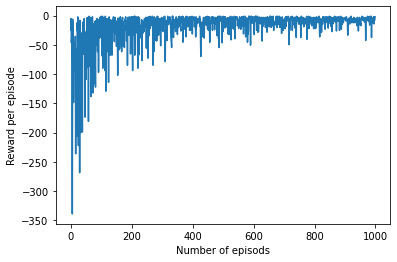

In [ ]:
environment = GridRules()
agentQ = Qlearning(environment)

reward_per_episode = run(environment, agentQ, trials=1000,  max_steps_per_episode=2000)

# Visualise the rewars per episode. Ideally this should show how learning process as a curve on a big enough amount ot episodes
plt.xlabel('Number of episods')
plt.ylabel('Reward per episode')
plt.plot(reward_per_episode)
print(max(reward_per_episode))
print(min(reward_per_episode))